# Zadanie: Budowa modelu NLP z użyciem warstw TensorFlow / PyTorch

Cel: Zbuduj model klasyfikujący komunikaty jako polecenie, pytanie lub twierdzenie, wykorzystując poznane warstwy (`Embedding`, `LSTM`, `Dense`, `Dropout`).


## Zadanie

Zbuduj model, który klasyfikuje krótkie komunikaty jako:

- `0` – polecenie (np. *Turn off the lights*)
- `1` – pytanie (np. *What time is it?*)
- `2` – informacja (np. *The keys are on the table*)

### Wymagania:

1. Tokenizacja i processing.
2. Warstwy wymagane:
   - `Embedding`
   - `LSTM` lub `GRU`
   - `Dropout`
   - `Dense` z aktywacją `softmax` (dla 3 klas)
3. Trening modelu: min. 5 epok
4. Ewaluacja: pokaż kilka prognoz na przykładowych zdaniach.



## Podpowiedzi

- Skorzystaj z `Tokenizer` i `pad_sequences` (w TF).
- Możesz użyć `Sequential` lub własnej klasy `Model`.
- Dla PyTorch: użyj `nn.Embedding`, `nn.LSTM`, `nn.Linear`.



## Zadanie dodatkowe

- Porównaj LSTM i GRU
- Zastosuj `BatchNormalization`
- Zamiast LSTM użyj `GlobalAveragePooling1D`



## Zgłoszenie

Prześlij plik `.ipynb` z Twoim rozwiązaniem i krótkim opisem w komentarzach.


In [1]:
data = [
    {'text': "Close the door soon.", 'label': 0},
    {'text': "Have you been there? please.", 'label': 1},
    {'text': "It is a beautiful day today.", 'label': 2},
    {'text': "What time is it? soon.", 'label': 1},
    {'text': "She likes chocolate", 'label': 2},
    {'text': "Are you ready?", 'label': 1},
    {'text': "We live in London now.", 'label': 2},
    {'text': "Lock the door right?", 'label': 0},
    {'text': "Take a seat today.", 'label': 0},
    {'text': "The train is late ", 'label': 2},
    {'text': "The cat is sleeping now.", 'label': 2},
    {'text': "Did you see that? please.", 'label': 1},
    {'text': "Why is it so cold? right?", 'label': 1},
    {'text': "What's your name?", 'label': 1},
    {'text': "It is a beautiful day", 'label': 2},
    {'text': "They arrived yesterday please.", 'label': 2},
    {'text': "The sun is shining", 'label': 2},
    {'text': "I left the keys on the table", 'label': 2},
    {'text': "The sun is shining ", 'label': 2},
    {'text': "They arrived yesterday", 'label': 2},
    {'text': "Where are you going? ", 'label': 1},
    {'text': "Can you help me? now.", 'label': 1},
    {'text': "Shut down the computer today.", 'label': 0},
    {'text': "Go outside ", 'label': 0},
    {'text': "Please sit down", 'label': 0},
    {'text': "She is watching TV soon.", 'label': 2},
    {'text': "The cat is sleeping soon.", 'label': 2},
    {'text': "Are you ready? .", 'label': 1},
    {'text': "Stand up now.", 'label': 0},
    {'text': "The sun is shining .", 'label': 2},
    {'text': "Shut down the computer", 'label': 0},
    {'text': "The train is late ", 'label': 2},
    {'text': "I left the keys on the table now.", 'label': 2},
    {'text': "Restart the system ", 'label': 0},
    {'text': "Leave the room right?", 'label': 0},
    {'text': "She likes chocolate now.", 'label': 2},
    {'text': "Bring me the book now.", 'label': 0},
    {'text': "Open the window today.", 'label': 0},
    {'text': "Do you like pizza? please.", 'label': 1},
    {'text': "This book is interesting", 'label': 2},
    {'text': "It is a beautiful day .", 'label': 2},
    {'text': "Is it working? today.", 'label': 1},
    {'text': "Open the window right?", 'label': 0},
    {'text': "Is this your phone? .", 'label': 1},
    {'text': "Is it raining? now.", 'label': 1},
    {'text': "Can you help me?", 'label': 1},
    {'text': "Stand up", 'label': 0},
    {'text': "How are you?", 'label': 1},
    {'text': "Clean the board ", 'label': 0},
    {'text': "Close the door soon.", 'label': 0},
    {'text': "Shall we go now? now.", 'label': 1},
    {'text': "Bring me the book", 'label': 0},
    {'text': "Do you like pizza?", 'label': 1},
    {'text': "Restart the system", 'label': 0},
    {'text': "Go outside", 'label': 0},
    {'text': "Can you help me? today.", 'label': 1},
    {'text': "Leave the room now.", 'label': 0},
    {'text': "This book is interesting right?", 'label': 2},
    {'text': "The train is late", 'label': 2},
    {'text': "She is watching TV now.", 'label': 2},
    {'text': "We are going shopping ", 'label': 2},
    {'text': "I enjoy reading today.", 'label': 2},
    {'text': "Take a seat please.", 'label': 0},
    {'text': "Lock the door", 'label': 0},
    {'text': "Why is it so cold? ", 'label': 1},
    {'text': "Close the door", 'label': 0},
    {'text': "Write your name right?", 'label': 0},
    {'text': "Are you ready? today.", 'label': 1},
    {'text': "How are you? right?", 'label': 1},
    {'text': "My phone is charging right?", 'label': 2},
    {'text': "I left the keys on the table soon.", 'label': 2},
    {'text': "My phone is charging", 'label': 2},
    {'text': "She likes chocolate please.", 'label': 2},
    {'text': "Is this your phone? ", 'label': 1},
    {'text': "Do you like pizza? today.", 'label': 1},
    {'text': "She is watching TV", 'label': 2},
    {'text': "He works at the bank", 'label': 2},
    {'text': "We are going shopping", 'label': 2},
    {'text': "What time is it? today.", 'label': 1},
    {'text': "What's your name? ", 'label': 1},
    {'text': "Clean the board ", 'label': 0},
    {'text': "Leave the room", 'label': 0},
    {'text': "He works at the bank now.", 'label': 2},
    {'text': "The cat is sleeping", 'label': 2},
    {'text': "Have you been there? today.", 'label': 1},
    {'text': "Where are you going?", 'label': 1},
    {'text': "Turn off the lights now.", 'label': 0},
    {'text': "Is it raining?", 'label': 1},
    {'text': "I enjoy reading .", 'label': 2},
    {'text': "What's your name? soon.", 'label': 1},
    {'text': "Clean the board", 'label': 0},
    {'text': "Turn off the lights", 'label': 0},
    {'text': "Please sit down please.", 'label': 0},
    {'text': "He works at the bank right?", 'label': 2},
    {'text': "Start the presentation", 'label': 0},
    {'text': "Is it working?", 'label': 1},
    {'text': "Go outside now.", 'label': 0},
    {'text': "He plays the guitar please.", 'label': 2},
    {'text': "My phone is charging soon.", 'label': 2},
    {'text': "Shut down the computer please.", 'label': 0},
    {'text': "He plays the guitar now.", 'label': 2},
    {'text': "Why is it so cold?", 'label': 1},
    {'text': "Bring me the book today.", 'label': 0},
    {'text': "We live in London ", 'label': 2},
    {'text': "Shall we go now?", 'label': 1},
    {'text': "Open the window", 'label': 0},
    {'text': "We are going shopping please.", 'label': 2},
    {'text': "When is the meeting?", 'label': 1},
    {'text': "Did you see that?", 'label': 1},
    {'text': "Start the presentation today.", 'label': 0},
    {'text': "They arrived yesterday today.", 'label': 2},
    {'text': "Where are you going? .", 'label': 1},
    {'text': "Start the presentation today.", 'label': 0},
    {'text': "Restart the system ", 'label': 0},
    {'text': "Is it raining? .", 'label': 1},
    {'text': "Is it working? right?", 'label': 1},
    {'text': "Have you been there?", 'label': 1},
    {'text': "Stand up please.", 'label': 0},
    {'text': "Did you see that? right?", 'label': 1},
    {'text': "Take a seat", 'label': 0},
    {'text': "Write your name today.", 'label': 0},
    {'text': "Please sit down now.", 'label': 0},
    {'text': "How are you? soon.", 'label': 1},
    {'text': "Lock the door soon.", 'label': 0},
    {'text': "He plays the guitar", 'label': 2},
    {'text': "This book is interesting soon.", 'label': 2},
    {'text': "When is the meeting? ", 'label': 1},
    {'text': "What time is it?", 'label': 1},
    {'text': "When is the meeting? now.", 'label': 1},
    {'text': "Shall we go now? please.", 'label': 1},
    {'text': "Is this your phone?", 'label': 1},
    {'text': "Write your name", 'label': 0},
    {'text': "I enjoy reading", 'label': 2},
    {'text': "Turn off the lights ", 'label': 0},
    {'text': "We live in London", 'label': 2}
]

In [3]:
!pip install tensorflow

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, BatchNormalization, GlobalAveragePooling1D
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Tokenizacja i preprocesing
texts = [item['text'] for item in data]
labels = np.array([item['label'] for item in data])

vocab_size = 1000
embedding_dim = 16
max_length = 30
trunc_type='post'
padding_type='post'

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

num_epochs = 20

In [17]:
#Model LSTM
print("--- Trening modelu z LSTM ---")
model_lstm = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(32),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_lstm = model_lstm.fit(padded_sequences, labels, epochs=num_epochs, verbose=2)

print("\nHistoria treningu (Model LSTM):")
print(history_lstm.history.keys())

--- Trening modelu z LSTM ---
Epoch 1/20
5/5 - 3s - 566ms/step - accuracy: 0.3481 - loss: 1.1004
Epoch 2/20
5/5 - 0s - 29ms/step - accuracy: 0.3556 - loss: 1.0971
Epoch 3/20
5/5 - 0s - 27ms/step - accuracy: 0.2593 - loss: 1.1053
Epoch 4/20
5/5 - 0s - 21ms/step - accuracy: 0.3259 - loss: 1.1020
Epoch 5/20
5/5 - 0s - 28ms/step - accuracy: 0.3556 - loss: 1.0977
Epoch 6/20
5/5 - 0s - 27ms/step - accuracy: 0.3704 - loss: 1.0976
Epoch 7/20
5/5 - 0s - 29ms/step - accuracy: 0.3630 - loss: 1.0949
Epoch 8/20
5/5 - 0s - 24ms/step - accuracy: 0.3111 - loss: 1.1026
Epoch 9/20
5/5 - 0s - 94ms/step - accuracy: 0.2889 - loss: 1.1054
Epoch 10/20
5/5 - 0s - 62ms/step - accuracy: 0.3259 - loss: 1.0984
Epoch 11/20
5/5 - 0s - 34ms/step - accuracy: 0.3259 - loss: 1.1033
Epoch 12/20
5/5 - 0s - 40ms/step - accuracy: 0.3333 - loss: 1.0967
Epoch 13/20
5/5 - 0s - 58ms/step - accuracy: 0.3481 - loss: 1.0962
Epoch 14/20
5/5 - 0s - 62ms/step - accuracy: 0.3259 - loss: 1.1007
Epoch 15/20
5/5 - 0s - 61ms/step - accur

In [18]:
# Model GlobalAveragePooling z batchnormalizacją
print("\n--- Trening modelu z GlobalAveragePooling1D i BatchNormalization ---")
model_gap_bn = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    BatchNormalization(),
    GlobalAveragePooling1D(),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model_gap_bn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_gap_bn = model_gap_bn.fit(padded_sequences, labels, epochs=num_epochs, verbose=2)

print("\nHistoria treningu (Model GlobalAveragePooling1D + BatchNormalization):")
print(history_gap_bn.history.keys())


--- Trening modelu z GlobalAveragePooling1D i BatchNormalization ---
Epoch 1/20
5/5 - 2s - 323ms/step - accuracy: 0.4148 - loss: 1.0898
Epoch 2/20
5/5 - 0s - 13ms/step - accuracy: 0.5407 - loss: 1.0573
Epoch 3/20
5/5 - 0s - 13ms/step - accuracy: 0.5852 - loss: 1.0236
Epoch 4/20
5/5 - 0s - 13ms/step - accuracy: 0.6741 - loss: 1.0002
Epoch 5/20
5/5 - 0s - 12ms/step - accuracy: 0.7630 - loss: 0.9694
Epoch 6/20
5/5 - 0s - 12ms/step - accuracy: 0.8815 - loss: 0.9271
Epoch 7/20
5/5 - 0s - 13ms/step - accuracy: 0.8593 - loss: 0.9202
Epoch 8/20
5/5 - 0s - 27ms/step - accuracy: 0.9037 - loss: 0.8757
Epoch 9/20
5/5 - 0s - 12ms/step - accuracy: 0.8889 - loss: 0.8718
Epoch 10/20
5/5 - 0s - 12ms/step - accuracy: 0.9259 - loss: 0.8397
Epoch 11/20
5/5 - 0s - 12ms/step - accuracy: 0.9111 - loss: 0.8170
Epoch 12/20
5/5 - 0s - 12ms/step - accuracy: 0.9333 - loss: 0.7821
Epoch 13/20
5/5 - 0s - 12ms/step - accuracy: 0.9333 - loss: 0.7615
Epoch 14/20
5/5 - 0s - 11ms/step - accuracy: 0.9407 - loss: 0.7501


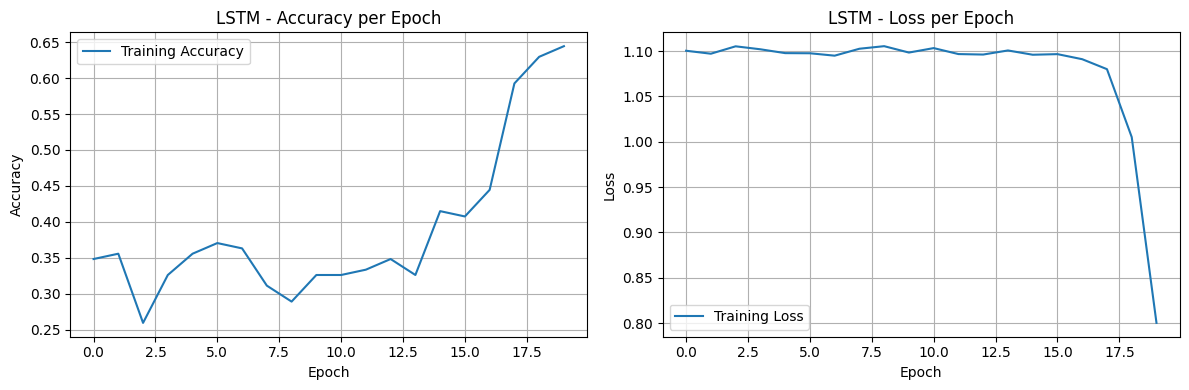

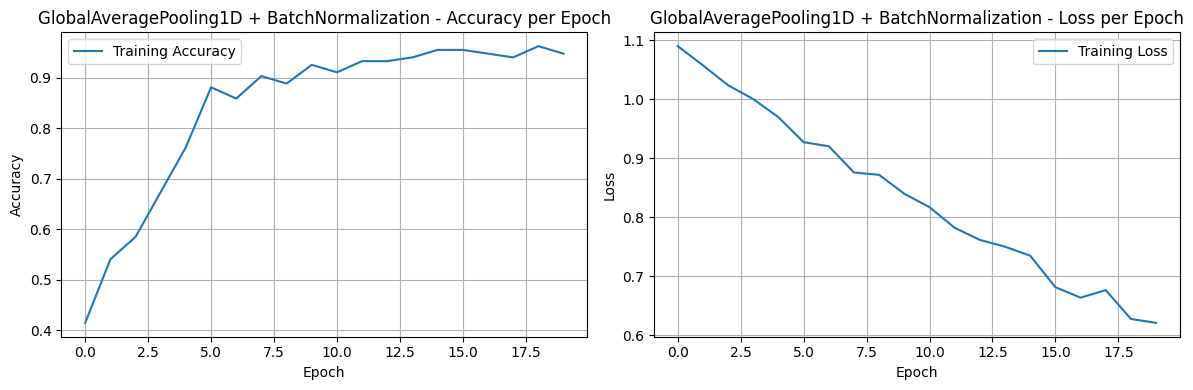

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

Predictions (Model z LSTM):
'Turn off the lights.' -> Predicted class: 0
'Is it going to rain?' -> Predicted class: 1
'The dog is barking.' -> Predicted class: 1
'He plays the guitar' -> Predicted class: 0
'Read this book.' -> Predicted class: 1
'How old are you?' -> Predicted class: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

Predictions (Model z GlobalAveragePooling1D + BatchNormalization):
'Turn off the lights.' -> Predicted class: 0
'Is it going to rain?' -> Predicted class: 1
'The dog is barking.' -> Predicted class: 0
'He plays the guitar' -> Predicted class: 0
'Read this book.' -> Predicted class: 0
'How old are you?' -> Predicted class: 1


In [22]:
# Funkcja pomocnicza do tworzenia wykresów
def plot_history(history, title):
    plt.figure(figsize=(12, 4))

    # Wykres Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Wykres Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_history(history_lstm, "LSTM")
plot_history(history_gap_bn, "GlobalAveragePooling1D + BatchNormalization")


test_sentences = [
    "Turn off the lights.",
    "Is it going to rain?",
    "The dog is barking.",
    "He plays the guitar",
    "Read this book.",
    "How old are you?"
]

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Prognozy dla modelu LSTM
predictions_lstm = model_lstm.predict(test_padded_sequences)
print("\nPredictions (Model z LSTM):")
for i, sentence in enumerate(test_sentences):
    predicted_class = np.argmax(predictions_lstm[i])
    print(f"'{sentence}' -> Predicted class: {predicted_class}")

# Prognozy dla modelu GlobalAveragePooling1D + BatchNormalization
predictions_gap_bn = model_gap_bn.predict(test_padded_sequences)
print("\nPredictions (Model z GlobalAveragePooling1D + BatchNormalization):")
for i, sentence in enumerate(test_sentences):
    predicted_class = np.argmax(predictions_gap_bn[i])
    print(f"'{sentence}' -> Predicted class: {predicted_class}")